In [1]:
# pip install pandas

In [2]:
import pandas as pd

In [3]:
#data used From P2P site LendingClub
df= pd.read_csv(r"E:\lendingclub\lending_club_loan_two.csv", nrows=100)

In [4]:
#removing unit - months from term column 
df['term'] = df['term'].str.replace('months', '')
df['term'] = df['term'].astype(int)

In [5]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


In [6]:
pd.set_option('display.max_rows', None)

In [7]:
#dropping all records having any Null values in its rows
df = df.dropna(how='any',axis=0) 


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 97
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             83 non-null     float64
 1   term                  83 non-null     int32  
 2   int_rate              83 non-null     float64
 3   installment           83 non-null     float64
 4   grade                 83 non-null     object 
 5   sub_grade             83 non-null     object 
 6   emp_title             83 non-null     object 
 7   emp_length            83 non-null     object 
 8   home_ownership        83 non-null     object 
 9   annual_inc            83 non-null     float64
 10  verification_status   83 non-null     object 
 11  issue_d               83 non-null     object 
 12  loan_status           83 non-null     object 
 13  purpose               83 non-null     object 
 14  title                 83 non-null     object 
 15  dti                   83 

In [9]:
#chcking if data has 10 years or is it so ,
#all exact 10 years have been considered 10+ years in general. 
df.loc[df['emp_length'] == '10 years']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [10]:
#no rows indicate our assumption of exact 10 years as 10+ years holds true.

In [11]:
#data cleaning

df_with_plus_removed= df['emp_length'].str.split("+").str[0]


In [12]:
df_with_years_removed = df_with_plus_removed.str.replace('years', '')

In [13]:
df_with_years_removed.head(5)

0          10
1          4 
2    < 1 year
3          6 
4          9 
Name: emp_length, dtype: object

In [14]:

replace_values = {'1 year':1, '< 1 year':0.6}
df['emp_length']=df_with_years_removed.replace(replace_values)

In [15]:
pd.options.mode.chained_assignment = None 
#avoids warning caused by using inplace = True

In [16]:
df.application_type.replace(to_replace=dict(INDIVIDUAL=1, JOINT=0), inplace=True)

In [17]:
pd.set_option("display.max_columns", None)

In [18]:
df.initial_list_status.replace(to_replace=dict(w=1, f=0), inplace=True)

In [19]:
# pd.unique(df[['Col1', 'Col2']].values.ravel('K')) for 2 colums' unique values
pd.unique(df[['home_ownership']].values.ravel('K'))

array(['RENT', 'MORTGAGE', 'OWN'], dtype=object)

In [20]:
df.home_ownership.replace(to_replace=dict(OWN=1, RENT=0,MORTGAGE=3), inplace=True)

In [21]:
pd.unique(df[['verification_status']].values.ravel('K'))

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [22]:
mapping = {'Not Verified': 0, 'Verified': 1,'Source Verified' : 2}
#avoid inplace
df=df.replace({'verification_status': mapping})

In [23]:
pd.unique(df[['grade']].values.ravel('K'))

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [24]:
grade_mapping = {'A': 1, 'B': 2,'C' : 3,'D': 4, 'E': 5,'F' : 6,'G' : 7}
df=df.replace({'grade': grade_mapping})

In [25]:
pd.unique(df[['loan_status']].values.ravel('K'))

array(['Fully Paid', 'Charged Off'], dtype=object)

In [26]:
loan_status_mapping = {'Fully Paid': 1, 'Charged Off': 2}
df=df.replace({'loan_status': loan_status_mapping})

In [27]:
df = df.drop('grade', axis=1)

In [28]:
df = df.drop('sub_grade', axis=1)

In [29]:
df = df.drop('title', axis=1)

In [30]:
df = df.drop('open_acc', axis=1)

In [31]:
df = df.drop('mort_acc', axis=1)

In [32]:
df = df.drop('revol_util', axis=1)

In [33]:
unique_strings=pd.unique(df[['emp_title']].values.ravel('K'))

In [34]:
unique_strings

array(['Marketing', 'Credit analyst ', 'Statistician', 'Client Advocate',
       'Destiny Management Inc.', 'HR Specialist',
       'Software Development Engineer', 'Office Depot',
       'Application Architect', 'Regado Biosciences', 'Sodexo',
       'Director Bureau of Equipment Inventory',
       'Social Work/Care Manager', 'Regional Counsel',
       'Pullman Regional Hospital', 'firefighter',
       'Comcast Corporate office', 'principal', 'Pilot',
       'Registered Nurse', 'Personal Trainer',
       'Francis Howell School District', 'Office Manager',
       'Operations Manager', 'Bartender', 'Anheuser-Busch ', 'Teacher',
       'Sr. Business Analyst', 'Medtronic, Inc.', 'Stocker',
       'Senior Software Engineer', 'dealer', 'facility technician',
       'Housekeeper', 'Shift Supervisor', 'laborer', 'Vegas.com', 'labor',
       'Home attendant ', 'Payroll Manager', 'Litigation Paralegal',
       'Accountant', 'Cracker Barrel Old Country Store', 'Rn',
       'Client Support Specia

In [35]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(unique_strings)))])

In [36]:
#one hot encoded columns
emp_title_one_hot_columns = pd.get_dummies(df.emp_title, prefix='emp_title')
print(emp_title_one_hot_columns.head(5))

   emp_title_Accountant  emp_title_Administrative Assistant  \
0                     0                                   0   
1                     0                                   0   
2                     0                                   0   
3                     0                                   0   
4                     0                                   0   

   emp_title_Administrator  emp_title_Anheuser-Busch   \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   emp_title_Application Architect  emp_title_Armored Car Guard  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3         

In [37]:
#one hot encoding led to sparse matrix so now what ?????
#https://stats.stackexchange.com/questions/325263/binary-encoding-vs-one-hot-encoding

In [38]:
import numpy as np
# Labels are the values we want to predict
labels = np.array(df['loan_status'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('loan_status', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [39]:
features

array([[10000.0, 36, 11.44, ..., 1, 0.0,
        '0174 Michelle Gateway\r\nMendozaberg, OK 22690'],
       [8000.0, 36, 11.99, ..., 1, 0.0,
        '1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113'],
       [15600.0, 36, 10.49, ..., 1, 0.0,
        '87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113'],
       ...,
       [30000.0, 36, 16.49, ..., 1, 1.0,
        '2528 Herrera Track Suite 897\r\nSavannahburgh, NY 70466'],
       [12625.0, 60, 25.78, ..., 1, 0.0,
        '522 Melissa Village\r\nEast Janice, MT 00813'],
       [13400.0, 60, 25.83, ..., 1, 0.0,
        '0326 Jacob Via\r\nJacksonstad, MI 93700']], dtype=object)

<h2>Why Random Forest not used</h2>
label encoding bad when not of order also random forest cant be used since our one hot encoding too big , and label encoding bad cause not in order ie are discontinuous/discrete numeric values.
<a>https://datascience.stackexchange.com/questions/5226/strings-as-features-in-decision-tree-random-forest</a>

In [40]:
issue_d_split= pd.DataFrame(df.issue_d.str.split('-',1).tolist(),
                                 columns = ['issue_d_month','issue_d_year'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_14600\3322543989.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  issue_d_split= pd.DataFrame(df.issue_d.str.split('-',1).tolist(),


In [41]:
# df=df.join(issue_d_split)

In [42]:
# df[['issue_d_month','issue_d_year','issue_d']]
# #the random indexing in issue_d cause problem in serial indexing of issue_d_month and year
# df.drop('issue_d_year', axis=1)
# df.drop('issue_d_month', axis=1)


In [43]:
issue_d_split.reset_index(drop=True, inplace=True)


In [44]:
issue_d_split.index

RangeIndex(start=0, stop=83, step=1)

In [45]:
issue_d_split.set_index(df.index,inplace=True)

In [46]:
issue_d_split.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 37, 38,
            39, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 59,
            60, 61, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79,
            80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 93, 94, 95, 96, 97],
           dtype='int64')

In [47]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 37, 38,
            39, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 59,
            60, 61, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79,
            80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 93, 94, 95, 96, 97],
           dtype='int64')

In [48]:
print(issue_d_split.index == df.index)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


In [49]:
test=df.join(issue_d_split)

In [50]:
test.shape

(83, 23)

In [51]:
df=test

In [52]:
earliest_cr_line_split= pd.DataFrame(df.earliest_cr_line.str.split('-',1).tolist(),
                                 columns = ['earliest_cr_line_month','earliest_cr_line_year'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_14600\2828959612.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  earliest_cr_line_split= pd.DataFrame(df.earliest_cr_line.str.split('-',1).tolist(),


In [53]:
earliest_cr_line_split.set_index(df.index,inplace=True)

In [54]:
test2=df.join(earliest_cr_line_split)

In [55]:
print(test2['earliest_cr_line'] == test2['earliest_cr_line_month']+"-"+test2['earliest_cr_line_year'])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
23    True
24    True
26    True
27    True
28    True
29    True
30    True
31    True
33    True
34    True
37    True
38    True
39    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
50    True
51    True
52    True
53    True
54    True
55    True
56    True
57    True
59    True
60    True
61    True
63    True
64    True
66    True
67    True
68    True
69    True
70    True
71    True
72    True
73    True
74    True
75    True
76    True
77    True
79    True
80    True
81    True
82    True
83    True
84    True
85    True
86    True
87    True
89    True
90    True
93    True
94    True
95    True
96    True
97    True
dtype: bool


In [56]:
test2.drop('earliest_cr_line', axis=1)

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec,revol_bal,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36,11.44,329.48,Marketing,10,0,117000.00,0,Jan-2015,1,vacation,26.24,0.0,36369.0,25.0,1,1,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Jan,2015,Jun,1990
1,8000.0,36,11.99,265.68,Credit analyst,4,3,65000.00,0,Jan-2015,1,debt_consolidation,22.05,0.0,20131.0,27.0,0,1,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Jan,2015,Jul,2004
2,15600.0,36,10.49,506.97,Statistician,0.6,0,43057.00,2,Jan-2015,1,credit_card,12.79,0.0,11987.0,26.0,0,1,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Jan,2015,Aug,2007
3,7200.0,36,6.49,220.65,Client Advocate,6,0,54000.00,0,Nov-2014,1,credit_card,2.60,0.0,5472.0,13.0,0,1,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",Nov,2014,Sep,2006
4,24375.0,60,17.27,609.33,Destiny Management Inc.,9,3,55000.00,1,Apr-2013,2,credit_card,33.95,0.0,24584.0,43.0,0,1,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",Apr,2013,Mar,1999
5,20000.0,36,13.33,677.07,HR Specialist,10,3,86788.00,1,Sep-2015,1,debt_consolidation,16.31,0.0,25757.0,23.0,0,1,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...,Sep,2015,Jan,2005
6,18000.0,36,5.32,542.07,Software Development Engineer,2,3,125000.00,2,Sep-2015,1,home_improvement,1.36,0.0,4178.0,25.0,0,1,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ...",Sep,2015,Aug,2005
7,13000.0,36,11.14,426.47,Office Depot,10,0,46000.00,0,Sep-2012,1,credit_card,26.87,0.0,13425.0,15.0,0,1,0.0,USCGC Nunez\r\nFPO AE 30723,Sep,2012,Sep,1994
8,18900.0,60,10.99,410.84,Application Architect,10,0,103000.00,1,Oct-2014,1,debt_consolidation,12.52,0.0,18637.0,40.0,1,1,0.0,USCGC Tran\r\nFPO AP 22690,Oct,2014,Jun,1994
9,26300.0,36,16.29,928.40,Regado Biosciences,3,3,115000.00,1,Apr-2012,1,debt_consolidation,23.69,0.0,22171.0,37.0,0,1,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813",Apr,2012,Dec,1997


In [57]:
df=test2

In [58]:
df.emp_title = df.emp_title.str.strip()

In [59]:
df['emp_title']=df['emp_title'].replace(' ', '_', regex=True)

<p>all space removal data cleaning</p>
<a>https://stackoverflow.com/questions/41476150/removing-space-from-columns-in-pandas</a>

In [60]:
df['emp_title'] = df['emp_title'].str.lower() 

In [61]:
df=df.drop('earliest_cr_line', axis=1)

In [62]:
df=df.drop('issue_d',axis=1)

In [63]:
df.purpose = df.purpose.str.strip()

In [64]:
X = df.drop(columns=["loan_status"])

In [65]:
y = df['loan_status']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [68]:
len(pd.unique(df[['emp_title']].values.ravel('K')))

81

In [69]:
pd.unique(df[['emp_title']].values.ravel('K'))

array(['marketing', 'credit_analyst', 'statistician', 'client_advocate',
       'destiny_management_inc.', 'hr_specialist',
       'software_development_engineer', 'office_depot',
       'application_architect', 'regado_biosciences', 'sodexo',
       'director_bureau_of_equipment_inventory',
       'social_work/care_manager', 'regional_counsel',
       'pullman_regional_hospital', 'firefighter',
       'comcast_corporate_office', 'principal', 'pilot',
       'registered_nurse', 'personal_trainer',
       'francis_howell_school_district', 'office_manager',
       'operations_manager', 'bartender', 'anheuser-busch', 'teacher',
       'sr._business_analyst', 'medtronic,_inc.', 'stocker',
       'senior_software_engineer', 'dealer', 'facility_technician',
       'housekeeper', 'shift_supervisor', 'laborer', 'vegas.com', 'labor',
       'home_attendant', 'payroll_manager', 'litigation_paralegal',
       'accountant', 'cracker_barrel_old_country_store', 'rn',
       'client_support_specialis

In [70]:
category_columns=['emp_title','purpose']
df_mapped=pd.DataFrame({col: df[col].astype('category').cat.codes for col in category_columns}, index=df.index)

In [71]:
throwaway=df

In [72]:
throwaway['emp_title'] = throwaway.emp_title.astype('category')

In [73]:
throwaway['purpose'] = throwaway.purpose.astype('category')

In [74]:
emp_title_mappings = dict( enumerate(throwaway['emp_title'].cat.categories ) )

In [75]:
len(emp_title_mappings)

81

In [76]:
len(pd.unique(throwaway['emp_title'].values.ravel('K')))

81

In [77]:
#both 707 meaning mapping done right as 707 unique data
len(throwaway['emp_title'])

83

In [78]:
inv_emp_title_mappings = {v: k for k, v in emp_title_mappings.items()}

In [79]:
df=df.replace({'emp_title': inv_emp_title_mappings })

In [80]:
pd.unique(df[['earliest_cr_line_month']].values.ravel('K'))

array(['Jun', 'Jul', 'Aug', 'Sep', 'Mar', 'Jan', 'Dec', 'May', 'Apr',
       'Oct', 'Feb', 'Nov'], dtype=object)

In [81]:
months_mapping = {'Jan': 1, 'Feb': 2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,
                  'Nov':11,'Dec':12}
df=df.replace({'earliest_cr_line_month': months_mapping})

In [82]:
pd.unique(df[['issue_d_month']].values.ravel('K'))

array(['Jan', 'Nov', 'Apr', 'Sep', 'Oct', 'Jun', 'May', 'Dec', 'Jul',
       'Feb', 'Mar', 'Aug'], dtype=object)

In [83]:
df=df.replace({'issue_d_month': months_mapping})

In [84]:
purpose_mappings = dict( enumerate(df['purpose'].cat.categories ) )

In [85]:
purpose_mappings

{0: 'car',
 1: 'credit_card',
 2: 'debt_consolidation',
 3: 'home_improvement',
 4: 'house',
 5: 'major_purchase',
 6: 'medical',
 7: 'moving',
 8: 'other',
 9: 'small_business',
 10: 'vacation'}

In [86]:
inv_purpose_mappings = {v: k for k, v in purpose_mappings.items()}

In [87]:
inv_purpose_mappings


{'car': 0,
 'credit_card': 1,
 'debt_consolidation': 2,
 'home_improvement': 3,
 'house': 4,
 'major_purchase': 5,
 'medical': 6,
 'moving': 7,
 'other': 8,
 'small_business': 9,
 'vacation': 10}

In [88]:
len(pd.unique(df[['purpose']].values.ravel('K')))

11

In [89]:
#hence mapping length = actual unique so mapping done right


In [90]:
df=df.replace({'purpose': inv_purpose_mappings})

In [91]:
address_as_category = df.address.astype('category')

In [92]:
df['address']=address_as_category

In [93]:
address_mappings = dict( enumerate(df['address'].cat.categories ) )

In [94]:
inv_address_mappings= {v: k for k, v in address_mappings.items()}

In [95]:
len(inv_address_mappings)

83

In [96]:
df=df.replace({'address': inv_address_mappings})

In [97]:
df.head(1)

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36,11.44,329.48,41,10,0,117000.0,0,1,10,26.24,0.0,36369.0,25.0,1,1,0.0,3,1,2015,6,1990


In [98]:
X = df.drop(columns=["loan_status"])

In [99]:
y = df['loan_status']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [101]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [102]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
y_prediction = model.predict(X_test)

In [104]:
print(y_prediction)

[1 1 1 2 1 1 2 2 2 2 1 1 2 1 1 2 2 1 1 2 1 1 2 1 2 1 1 1 1 1]


In [105]:
from sklearn.metrics import accuracy_score
prediction_accuracy = accuracy_score(y_test, y_prediction)

In [106]:
prediction_accuracy 

0.6

In [107]:
df.shape

(83, 23)

In [108]:
df.iloc[[2]].drop(columns=["loan_status"]) 
y_prediction = model.predict(df.iloc[[2]].drop(columns=["loan_status"]))

In [109]:
print(y_prediction)

[1]


In [110]:
df.iloc[[2]]

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
2,15600.0,36,10.49,506.97,74,0.6,0,43057.0,2,1,1,12.79,0.0,11987.0,26.0,0,1,0.0,67,1,2015,8,2007


In [111]:
df.iloc[[4]]

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
4,24375.0,60,17.27,609.33,25,9,3,55000.0,1,2,1,33.95,0.0,24584.0,43.0,0,1,0.0,56,4,2013,3,1999


In [112]:
print((df[df['loan_status'] == 2]).index) #those with loan status 2 for testing

Int64Index([4, 26, 48, 54, 69, 72, 81, 82, 84, 97], dtype='int64')


In [113]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 37, 38,
            39, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 59,
            60, 61, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79,
            80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 93, 94, 95, 96, 97],
           dtype='int64')

In [114]:
row_index=97
for i in df.index :
    row=df.loc[[i]]
    row_actual_loan_status= row.iloc[0]['loan_status']
    prediction=model.predict(row.drop(columns=["loan_status"]))
    if(prediction)== 2:
        print("The index that model predicted as loan_status as 2 = ",i)
        print("Correctly Predicted") if (row_actual_loan_status == prediction) else print("Wrongly Predicted")
       

The index that model predicted as loan_status as 2 =  3
Wrongly Predicted
The index that model predicted as loan_status as 2 =  26
Correctly Predicted
The index that model predicted as loan_status as 2 =  31
Wrongly Predicted
The index that model predicted as loan_status as 2 =  44
Wrongly Predicted
The index that model predicted as loan_status as 2 =  48
Correctly Predicted
The index that model predicted as loan_status as 2 =  54
Correctly Predicted
The index that model predicted as loan_status as 2 =  56
Wrongly Predicted
The index that model predicted as loan_status as 2 =  64
Wrongly Predicted
The index that model predicted as loan_status as 2 =  68
Wrongly Predicted
The index that model predicted as loan_status as 2 =  69
Correctly Predicted
The index that model predicted as loan_status as 2 =  72
Correctly Predicted
The index that model predicted as loan_status as 2 =  81
Correctly Predicted
The index that model predicted as loan_status as 2 =  82
Correctly Predicted
The index th

In [115]:
for i in df.index :
    row=df.loc[[i]]
    row_actual_loan_status= row.iloc[0]['loan_status']
    prediction=model.predict(row.drop(columns=["loan_status"]))
    if(prediction)!= row_actual_loan_status:
        print("The index that model predicted wrong = ",i,"with its actual being",row_actual_loan_status,"while predicted",prediction)
    else:
        print("The data index at",i,"was predicted = ",prediction,"which is equal to its actual =",row_actual_loan_status)

The data index at 0 was predicted =  [1] which is equal to its actual = 1
The data index at 1 was predicted =  [1] which is equal to its actual = 1
The data index at 2 was predicted =  [1] which is equal to its actual = 1
The index that model predicted wrong =  3 with its actual being 1 while predicted [2]
The index that model predicted wrong =  4 with its actual being 2 while predicted [1]
The data index at 5 was predicted =  [1] which is equal to its actual = 1
The data index at 6 was predicted =  [1] which is equal to its actual = 1
The data index at 7 was predicted =  [1] which is equal to its actual = 1
The data index at 8 was predicted =  [1] which is equal to its actual = 1
The data index at 9 was predicted =  [1] which is equal to its actual = 1
The data index at 10 was predicted =  [1] which is equal to its actual = 1
The data index at 11 was predicted =  [1] which is equal to its actual = 1
The data index at 12 was predicted =  [1] which is equal to its actual = 1
The data in

In [116]:
import pickle


In [117]:
filename = 'finalized_model3.sav'
# pickle.dump(model, open(filename, 'wb'))

In [118]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(df.iloc[[4]].drop(columns=["loan_status"]))
print(result)

[2]


In [119]:
df.iloc[[4]]

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
4,24375.0,60,17.27,609.33,25,9,3,55000.0,1,2,1,33.95,0.0,24584.0,43.0,0,1,0.0,56,4,2013,3,1999


In [120]:
result = loaded_model.predict(df.iloc[[5]].drop(columns=["loan_status"]))
print(result)

[1]


In [121]:
df.iloc[[4]].loan_status

4    2
Name: loan_status, dtype: int64

In [122]:
y_prediction = model.predict(df.iloc[[5]].drop(columns=["loan_status"]))
print(y_prediction)

[1]


In [123]:
df.iloc[[4]].loan_status

4    2
Name: loan_status, dtype: int64

In [124]:
df.head(5)

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36,11.44,329.48,41,10,0,117000.0,0,1,10,26.24,0.0,36369.0,25.0,1,1,0.0,3,1,2015,6,1990
1,8000.0,36,11.99,265.68,22,4,3,65000.0,0,1,2,22.05,0.0,20131.0,27.0,0,1,0.0,12,1,2015,7,2004
2,15600.0,36,10.49,506.97,74,0.6,0,43057.0,2,1,1,12.79,0.0,11987.0,26.0,0,1,0.0,67,1,2015,8,2007
3,7200.0,36,6.49,220.65,14,6,0,54000.0,0,1,1,2.60,0.0,5472.0,13.0,0,1,0.0,65,11,2014,9,2006
4,24375.0,60,17.27,609.33,25,9,3,55000.0,1,2,1,33.95,0.0,24584.0,43.0,0,1,0.0,56,4,2013,3,1999


In [125]:
address_mappings[25]

'3126 Sean Dale Apt. 141\r\nSouth Matthew, MS 00813'

In [126]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'application_type', 'pub_rec_bankruptcies',
       'address', 'issue_d_month', 'issue_d_year', 'earliest_cr_line_month',
       'earliest_cr_line_year'],
      dtype='object')

In [127]:
df.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14600\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,dti,pub_rec,revol_bal,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,issue_d_month,earliest_cr_line_month
loan_amnt,1.000000,0.255368,0.052137,0.958966,0.341106,0.565684,0.272936,-0.196229,0.118193,0.037559,0.517808,0.446392,-0.087363,0.107039,0.037559,-0.041654,-0.172042
term,0.255368,1.000000,0.537734,0.026821,0.218808,0.171927,0.281049,0.125139,0.102427,-0.001559,0.186306,0.085769,0.258628,0.064270,-0.001559,0.155418,0.109309
int_rate,0.052137,0.537734,1.000000,0.020267,0.030917,-0.057031,0.050372,0.273182,0.191816,0.008131,0.025471,0.097353,0.032218,0.106643,0.008131,0.016796,0.194176
installment,0.958966,0.026821,0.020267,1.000000,0.288603,0.523865,0.223038,-0.221122,0.092777,0.065841,0.442554,0.457777,-0.152050,0.104902,0.065841,-0.060150,-0.151070
home_ownership,0.341106,0.218808,0.030917,0.288603,1.000000,0.308576,-0.065234,-0.040509,-0.075543,-0.071439,0.304096,0.307921,0.051439,0.035060,-0.071439,0.167856,-0.119456
annual_inc,0.565684,0.171927,-0.057031,0.523865,0.308576,1.000000,0.116957,-0.277040,-0.003378,0.060706,0.503368,0.464138,-0.114387,0.054634,0.060706,-0.010149,-0.065340
verification_status,0.272936,0.281049,0.050372,0.223038,-0.065234,0.116957,1.000000,-0.071117,0.002456,-0.128681,0.107362,0.002475,-0.037334,0.133041,-0.128681,0.104383,0.067064
loan_status,-0.196229,0.125139,0.273182,-0.221122,-0.040509,-0.277040,-0.071117,1.000000,0.185037,-0.083283,-0.104552,-0.076085,0.040371,0.040873,-0.083283,-0.091301,-0.141587
dti,0.118193,0.102427,0.191816,0.092777,-0.075543,-0.003378,0.002456,0.185037,1.000000,-0.104771,0.349495,0.199647,0.145403,-0.141495,-0.104771,-0.240889,-0.221230
pub_rec,0.037559,-0.001559,0.008131,0.065841,-0.071439,0.060706,-0.128681,-0.083283,-0.104771,1.000000,-0.140490,-0.174703,0.024544,0.024849,1.000000,0.169628,0.055065


In [128]:
# pip install seaborn

C:\Users\Dell\AppData\Local\Temp\ipykernel_14600\3390726168.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


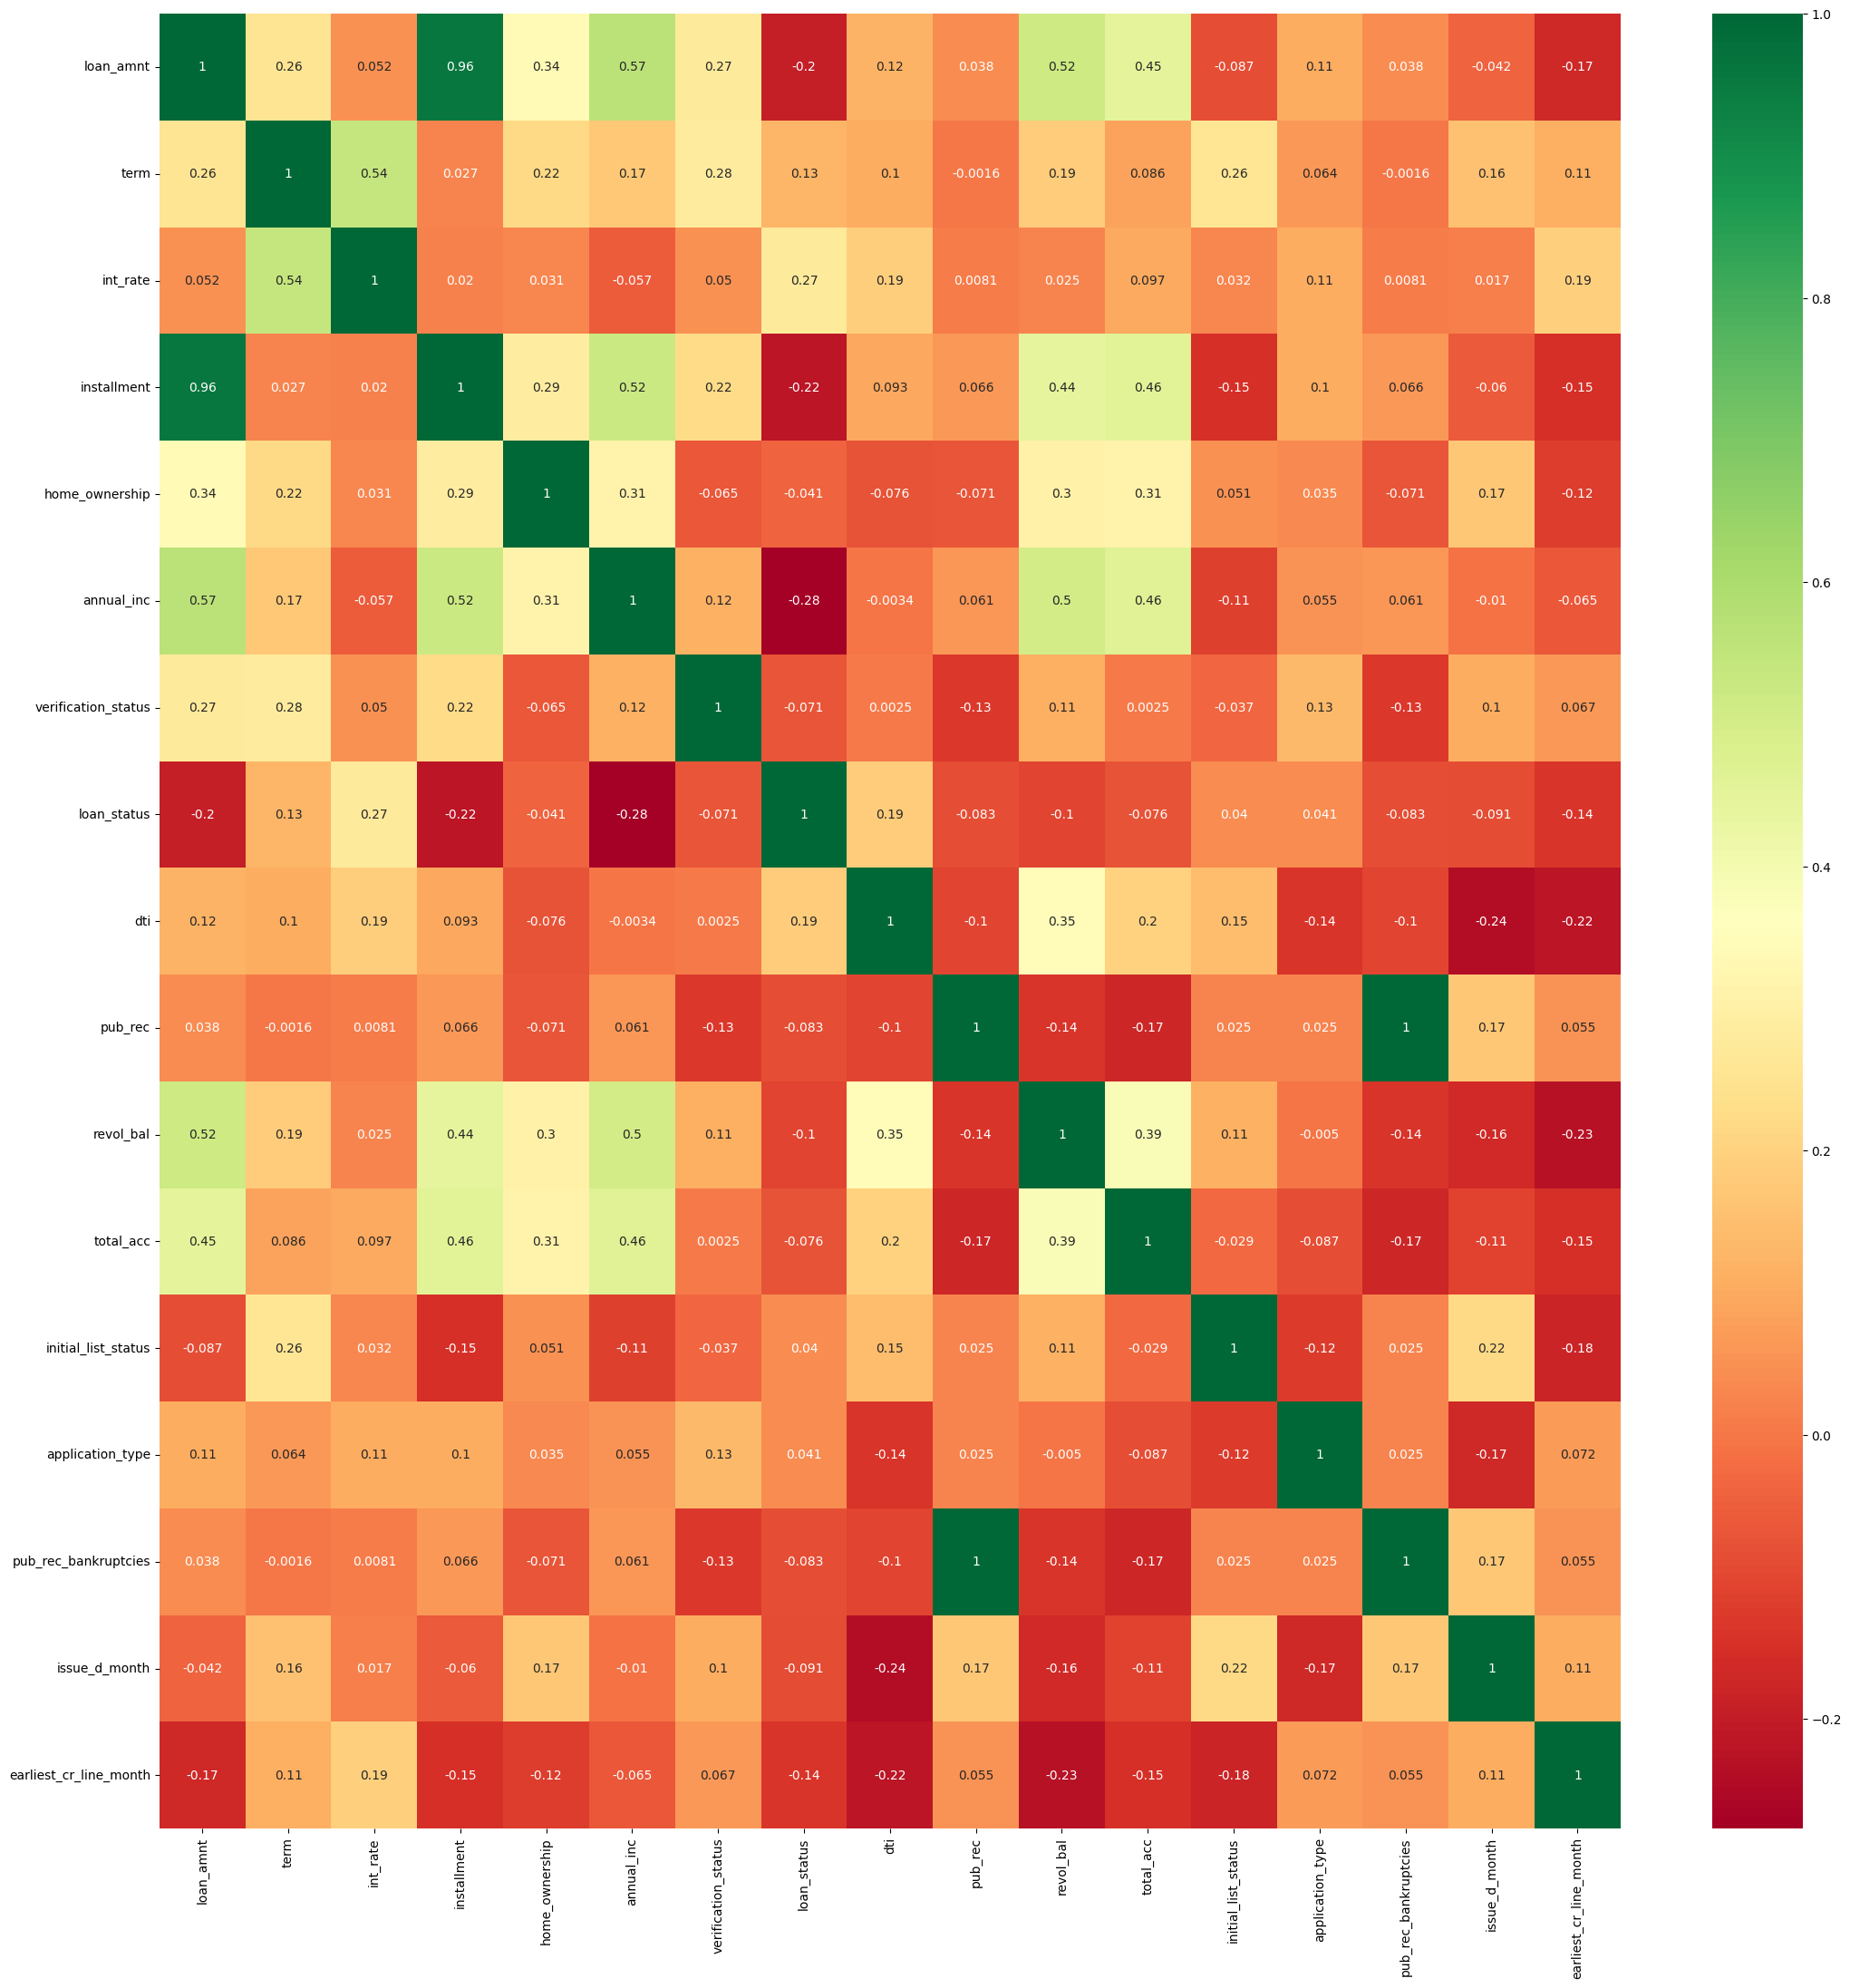

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(26,26))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")